<a href="https://colab.research.google.com/github/Cjackett13/literate-broccoli/blob/main/mental_helth_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
import pandas as pd

entries_df = pd.read_csv("10000_synthetic_mental_health_journal.csv")
traits_df = pd.read_csv("10000_user_traits - 10000_user_traits.csv")

print(entries_df.head())
print(traits_df.head())

                                       journal_entry      mood      stressors  \
0  I feel stressed today. Lately, I've been strug...  stressed        finance   
1  This week has been neutral. I’m feeling pretty...     happy         health   
2  It's been a disappointed kind of day. health h...   content         health   
3  I feel happy today. Lately, I've been struggli...     happy  relationships   
4  This week has been neutral. I’m feeling pretty...  stressed      academics   

      coping_strategy          tone                   timestamp  user_id  
0                none       neutral  2025-06-27T19:44:08.567973        1  
1                none       neutral  2025-07-14T19:44:08.568019        2  
2  talking to friends  disappointed  2025-07-23T19:44:08.568036        3  
3          meditation         angry  2025-07-26T19:44:08.568059        4  
4               music       neutral  2025-07-14T19:44:08.568074        5  
   user_id             gender  age             race religion ag

In [36]:
import os

# List files to confirm your files are uploaded
os.listdir()


['.config',
 '10000_synthetic_mental_health_journal (1).csv',
 '10000_synthetic_mental_health_journal.csv',
 '10000_user_traits - 10000_user_traits.csv',
 'drive',
 'sample_data']

In [37]:
print("Entries DataFrame shape:", entries_df.shape)
print("Traits DataFrame shape:", traits_df.shape)

# Display data types and first few rows
print(entries_df.info())
print(entries_df.head())
print(traits_df.info())
print(traits_df.head())

Entries DataFrame shape: (10000, 7)
Traits DataFrame shape: (10000, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   journal_entry    10000 non-null  object
 1   mood             10000 non-null  object
 2   stressors        10000 non-null  object
 3   coping_strategy  10000 non-null  object
 4   tone             10000 non-null  object
 5   timestamp        10000 non-null  object
 6   user_id          10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB
None
                                       journal_entry      mood      stressors  \
0  I feel stressed today. Lately, I've been strug...  stressed        finance   
1  This week has been neutral. I’m feeling pretty...     happy         health   
2  It's been a disappointed kind of day. health h...   content         health   
3  I feel happy today. Lately, I've

In [38]:
import re

# Function to clean journal entries
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text.lower()  # Lowercase conversion

# Apply the cleaning function to the journal_entry column
entries_df['cleaned_content'] = entries_df['journal_entry'].apply(clean_text)

In [39]:
print(traits_df.isnull().sum())  # Check for missing values

# For example, you can drop rows with NaN values in religion
traits_df.dropna(subset=['religion'], inplace=True)

user_id                    0
gender                     0
age                        0
race                       0
religion                1419
age_group                  0
occupation                 0
sexual_orientation         0
disability_status          0
socioeconomic_status       0
education_level            0
location                   0
dtype: int64


In [40]:
X = entries_df['cleaned_content']
y = entries_df['mood']

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [43]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_vec, y_train)

LogisticRegression()

In [44]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test_vec)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     anxious       1.00      1.00      1.00       235
     content       1.00      1.00      1.00       251
       happy       1.00      1.00      1.00       249
     hopeful       1.00      1.00      1.00       248
        numb       1.00      1.00      1.00       264
 overwhelmed       1.00      1.00      1.00       253
         sad       1.00      1.00      1.00       263
    stressed       1.00      1.00      1.00       237

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



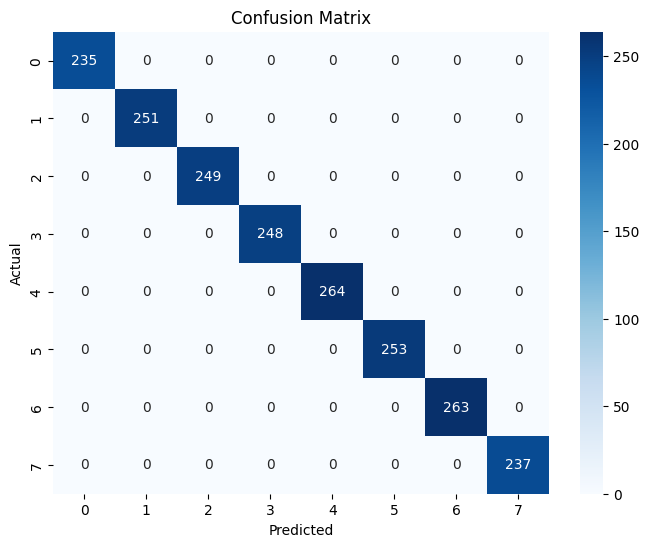

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [46]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [49]:
entries_df = pd.read_csv("10000_synthetic_mental_health_journal.csv")
traits_df = pd.read_csv("10000_user_traits - 10000_user_traits.csv")

# Clean and preprocess (example)
def clean_text(text):
    import re
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text.lower()  # Convert to lowercase

entries_df['cleaned_content'] = entries_df['journal_entry'].apply(clean_text)

In [50]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(entries_df['cleaned_content']) # Replace with your edited column name

In [51]:
# Fit the K-Means model
k = 3  # Choose the number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# Add cluster labels to the DataFrame
entries_df['cluster'] = kmeans.labels_

# Check the distribution of clusters
print(entries_df['cluster'].value_counts())  # Show how many entries are in each cluster


cluster
0    5008
1    2553
2    2439
Name: count, dtype: int64


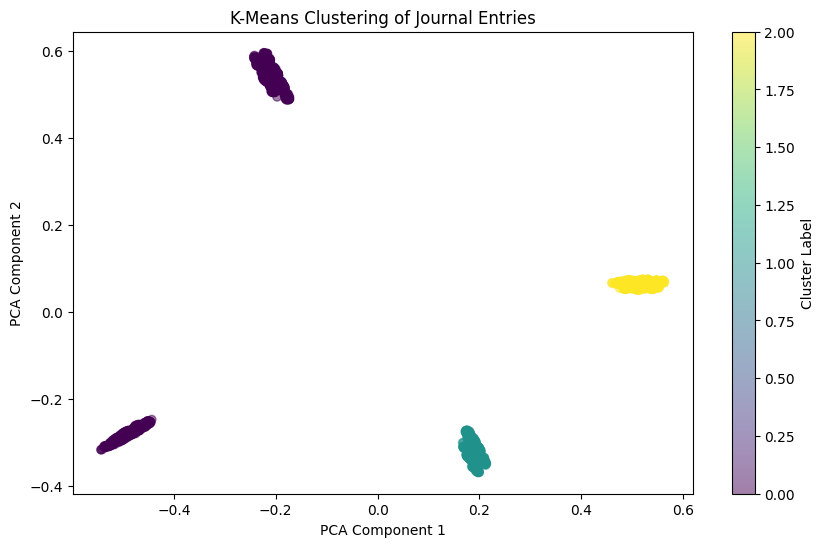

In [52]:
# Reduce dimensionality for visualization
pca = PCA(n_components=2)
reduced_X = pca.fit_transform(X.toarray())  # Convert sparse matrix to dense

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(reduced_X[:, 0], reduced_X[:, 1], c=entries_df['cluster'], cmap='viridis', alpha=0.5)
plt.title('K-Means Clustering of Journal Entries')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()